<div style="text-align: center; font-size: 24pt; font-weight: bold;">
E-Commerce Shipping Analysis
</div>

<div style="text-align: center; font-size: 18pt;">
Exploratory Data Analysis of On-Time Delivery Performance
</div>

<div style="text-align: center; margin-top: 20px;">
<strong>Derek Eodice, MBA, MSc</strong><br>
</div>

<div style="text-align: center; margin-top: 20px;">
<strong>Date:</strong> December 27, 2025
</div>

# Table of Contents

- [Introduction](#introduction)
- [Data Import and Data Cleansing](#data-import-and-cleansing)
- [EDA](#eda)
- [Dataset Questions](#dataset-questions)
- [Conclusion](#conclusion)

# Introduction
<a id="introduction"></a>

The rapid expansion of global e-commerce has placed unprecedented pressure on logistics networks. Customers expect fast, accurate, and reliable delivery—often at low cost. For businesses operating at scale, even a small increase in delay rates can trigger customer dissatisfaction, negative reviews, and operational losses.

The goal of this analysis is to identify the key factors that influence whether an e-commerce shipment arrives on time. Using the Customer Analytics dataset, we will explore how product characteristics, shipping modes, warehouse operations, customer ratings, and transit durations interact to affect delivery performance.

This notebook will cover:

1. Data understanding and cleaning
2. Exploratory analysis of customer, product, and logistics variables
3. Relationship analysis between features and on-time delivery
4. Insights and actionable recommendations

Ultimately, our objective is not only to understand what drives late deliveries, but how businesses can mitigate risks and improve their logistics workflows.

### Dataset Questions
1. What was the Customer Rating? And was the product delivered on time?
2. Was the customer’s query answered?
3. For products with high importance, do they have the highest ratings or are they delivered on time?

<div style="page-break-after:always;"></div>

# Data Import and Data Cleansing

Our first step is to import the data directly from Kaggle. We will use the kagglehub package to link our Jupyter Notebook directly to Kaggle and download from there. Once we have the data downloaded from Kaggle, we will import the dataset into our Jupyter Notebook using `read_csv` from Pandas.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prachi13/customer-analytics")

print("Path to dataset files:", path)

# List files in the downloaded directory to see what's there
print("Files in dataset directory:")
for file in os.listdir(path):
    print(file)

Path to dataset files: C:\Users\derek\.cache\kagglehub\datasets\prachi13\customer-analytics\versions\1
Files in dataset directory:
.notebook
Train.csv


In [2]:
import pandas as pd

# Load the actual CSV file (the main file in this dataset is Train.csv)
csv_path = os.path.join(path, "Train.csv")  # or whatever the exact filename is

df = pd.read_csv(csv_path)

# Inspect the first few rows
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Check the datatypes and shape of our data
print(df.dtypes)
print(df.shape)

# Check for anomalies or badly formatted data in each of the columns.
print(f"\n{df['Warehouse_block'].value_counts():}")
print(f"\n{df['Mode_of_Shipment'].value_counts()}")
print(f"\n{round(df['Customer_care_calls'].describe(),2)}")
print(f"\n{round(df['Customer_rating'].describe(),2)}")
print(f"\n{round(df['Cost_of_the_Product'].describe(),2)}")
print(f"\n{round(df['Prior_purchases'].describe(),2)}")
print(f"\n{round(df['Product_importance'].value_counts(),2)}")
print(f"\n{round(df['Gender'].value_counts(),2)}")
print(f"\n{round(df['Discount_offered'].describe(),2)}")
print(f"\n{round(df['Weight_in_gms'].describe(),2)}")

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
(10999, 12)

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

count    10999.00
mean         4.05
std          1.14
min          2.00
25%          3.00
50%          4.00
75%          5.00
max          7.00
Name: Customer_care_calls, dtype: float64

count    10999.00
mean         2.99
std          1.41
min          1.00
25%          2.00
50%          3.00
75%          4.00
max          5.00
Name: Customer_rating, dtype: float64

count    10999.00
mean       210.20
std         48.06
min    

<p>Our initial analysis yielded a dataframe of types `object` and `int64` across all 12 columns. The data frame shape of (10999, 12) indicated no irregularities in the shape of the data frame itself. The test of data integrity for each column yielded no errors nor anomalies that could otherwise jeopardize further data analysis. Therefore, no further data cleansing is required prior to conducting exploratory data analysis (EDA).</p>

<div style="page-break-after:always;"></div>

# EDA

<p>Now that we confirmed our data upload and data integrity (clean, structured data for analysis), we can begin our exploratory data analysis (hereon referred to as EDA). Our first step in this section is to segment the numeric data from the data frame for easier analysis. We will do this by creating a data frame titled `numeric` that selects the `int64` data type. We will then drop the ID column from our numeric data frame, as this will not yield noteworthy results. Our final step in this process is to perform summary statistics on the remaining numeric columns.</p>

In [4]:
'''Now that we have our initial dataframe, we need to check the data types.'''
# print(df.dtypes)

'''Lets' create a numeric dataframe to get some basic statistics.'''
numeric = df.select_dtypes(include=["int64"]).drop(columns=["ID"])
numeric.describe().round(2)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


<p> Understanding the end-to-end flow of cargo in the logistics industry is imperative for success. While this dataset does not include all steps of the shipping process, it does contain detailed information about the origin warehouses. Our dataset contains five warehouses for the 10,999 shipments in question. We will look at the total number of shipments and overall percentage of shipments from each warehouse as part of our EDA. We will do this by first creating a dataset called `warehouse_summary` by using the `groupby` function. Next, we will calculate the sum of all of the shipments and use this to create a column that calculates the percentage of shipments from each warehouse (`% of Total Shipments`). </p>

In [5]:
# Create a warehouse block summary

warehouse_summary = (
    df.groupby('Warehouse_block')
    .size()
    .reset_index(name='Warehouse Block Shipments')
)

# Get a percentile representation across the whole dataset
warehouse_shipments_all = warehouse_summary['Warehouse Block Shipments'].sum()

warehouse_summary['% of Total Shipments'] = (
    warehouse_summary['Warehouse Block Shipments']/warehouse_shipments_all
)*100

# Round the result to two decimal places
warehouse_summary['% of Total Shipments'] = warehouse_summary['% of Total Shipments'].round(2)

# Test the new dataframe
warehouse_summary

,Warehouse_block,Warehouse Block Shipments,% of Total Shipments
0,A,1833,16.67
1,B,1833,16.67
2,C,1833,16.67
3,D,1834,16.67
4,F,3666,33.33


In [6]:
'''
In the following lines of code, we need to find the blocks and modes of shipments with the most shipments. 
'''
# WAREHOUSE

# Find the integer-location index (iloc index) of the maximum value
iloc_index_of_max = warehouse_summary['Warehouse Block Shipments'].idxmax()

# Use .iloc to find the row with the highest shipments
row_with_highest_shipments = warehouse_summary.iloc[iloc_index_of_max]

# Extract values
warehouse_block = row_with_highest_shipments['Warehouse_block']
total_shipments = row_with_highest_shipments['Warehouse Block Shipments']

warehouse_report = f"""
**Warehouse and Dataframe Summaries**<br>

The number of rows in our data frame is {len(df)}. The number of rows in our data frame is {df.shape[1]}.
The total number of datapoints in our dataset is {df.shape[1] * len(df)}. The warehouse block with the most shipments was {warehouse_block} with {total_shipments} shipments.
"""

customer_and_shipment_report = f"""
**Customer and Shipment Summaries**<br>

The average customer called {numeric['Customer_care_calls'].mean():.0f} times about their shipment(s), rated their experience a {numeric['Customer_rating'].mean():.2f} out of {numeric['Customer_rating'].max()}, and made {numeric['Prior_purchases'].mean():.0f} prior purchases.
The average product cost ${numeric['Cost_of_the_Product'].mean():.2f}, was discounted an average of {numeric['Discount_offered'].mean():.2f}%, and weighed an average of {numeric['Weight_in_gms'].mean():.2f} grams.
With the understanding that 1 = 'No' and 0 = 'Yes', our mean value of {numeric['Reached.on.Time_Y.N'].mean():.2f} indicates that the majority of the shipments did not arrive on time.
"""

display(Markdown(warehouse_report))
display(Markdown(customer_and_shipment_report))


**Warehouse and Dataframe Summaries**<br>

The number of rows in our data frame is 10999. The number of rows in our data frame is 12.
The total number of datapoints in our dataset is 131988. The warehouse block with the most shipments was F with 3666 shipments.



**Customer and Shipment Summaries**<br>

The average customer called 4 times about their shipment(s), rated their experience a 2.99 out of 5, and made 4 prior purchases.
The average product cost $210.20, was discounted an average of 13.37%, and weighed an average of 3634.02 grams.
With the understanding that 1 = 'No' and 0 = 'Yes', our mean value of 0.60 indicates that the majority of the shipments did not arrive on time.


Now that we have a clean dataset, the next step is to get a basic understanding of our data. We will start by gathering some summary statistics on the dataset as a whole, and some of the points of interest as outlined in the instructions on Kaggle.

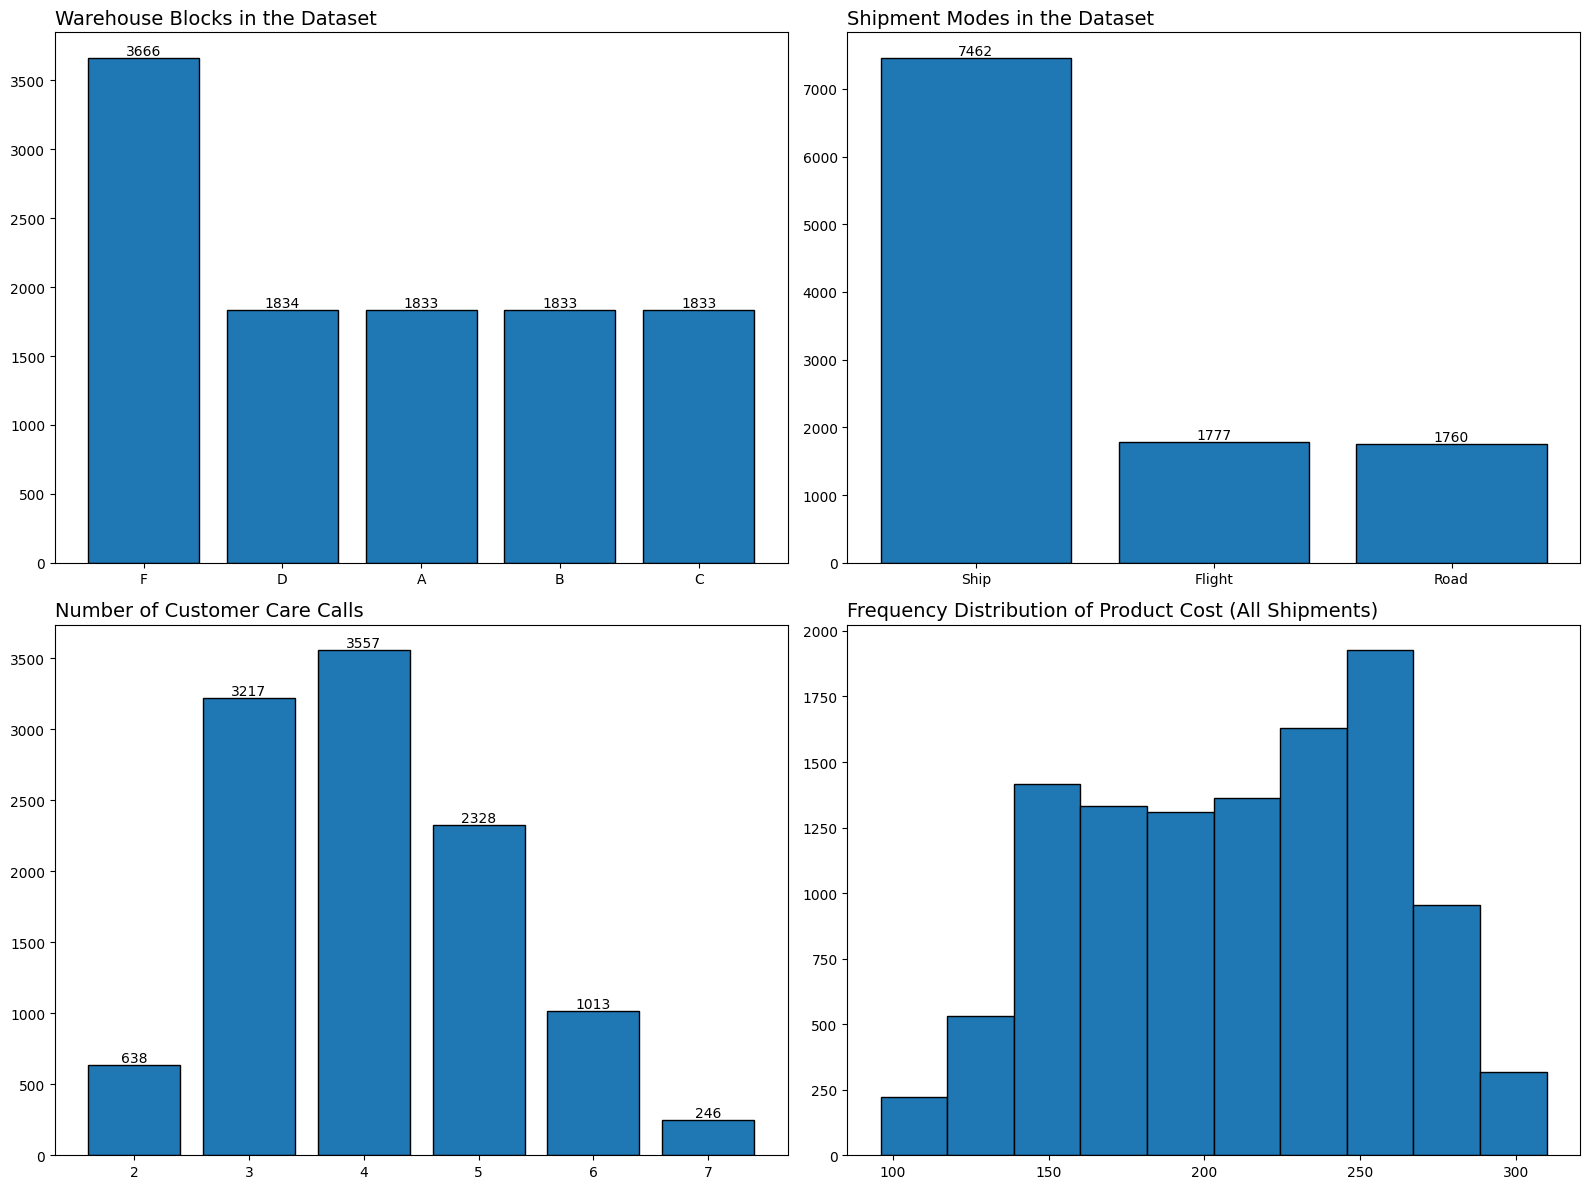

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

important = df[df["Product_importance"] == "high"]
important_mode_counts = important['Mode_of_Shipment'].value_counts()

# ax.bar(important_mode_counts.index, important_mode_counts.values, edgecolor = 'black')
# Create individual df's for the following 4 plots.

warehouse_blocks_counts = df['Warehouse_block'].value_counts()
shipment_mode_counts = df['Mode_of_Shipment'].value_counts()
customer_care_calls_counts = df['Customer_care_calls'].value_counts()
product_cost = df['Cost_of_the_Product']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
plt.subplots_adjust(hspace=0.4, wspace=0.2) 

# --- Plot 1 (Top-Left: Warehouse blocks) ---
ax0 = axes[0, 0]
ax0.bar(warehouse_blocks_counts.index,warehouse_blocks_counts.values,edgecolor = 'black')

ax0.get_figure().canvas.draw() 
if ax0.legend_ is not None:
    ax0.legend_.remove() # Manually remove legend

for bar in ax0.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax0.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Warehouse Blocks in the Dataset', fontsize=14, loc = 'left')


# --- Plot 2 (Top-Right: Shipment Modes) ---
ax1 = axes[0, 1]
ax1.bar(shipment_mode_counts.index,shipment_mode_counts.values,edgecolor = 'black')

ax1.get_figure().canvas.draw() 
if ax1.legend_ is not None:
    ax1.legend_.remove() # Manually remove legend

for bar in ax1.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax1.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Shipment Modes in the Dataset', fontsize=14, loc = 'left')


# --- Plot 3 (Bottom-Left: Customer Care Calls) ---
ax2 = axes[1, 0]
ax2.bar(customer_care_calls_counts.index, customer_care_calls_counts.values, edgecolor='black')

ax2.get_figure().canvas.draw() 
if ax2.legend_ is not None:
    ax2.legend_.remove() # Manually remove legend

for bar in ax2.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax2.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax2.set_xlabel("") 
ax2.set_ylabel("")
ax2.set_title('Number of Customer Care Calls', loc="left", fontsize=14)


# --- Plot 4 (Bottom-Right: Cost of the product) ---
ax3 = axes[1, 1]
plt.hist(
    product_cost, edgecolor = 'black')

ax3.set_xlabel("") 
ax3.set_ylabel("") 
ax3.set_title('Frequency Distribution of Product Cost (All Shipments)', loc="left", fontsize=14)


# Final adjustment for clean display
plt.tight_layout()
plt.show()

<div style="page-break-after:always;"></div>

# Dataset Questions
## Question 1: Customer Rating and On-Time Delivery


The avearge customer service rating for the 10999 shipments in our dataset was 2.99. Out of the 10999 shipments,
4436 were delivered on time and 6563 were not delivered on time. This led to an 
on-time delivery rate of 40.33%. We can therefore confirm that most shipments were not delivered on time.


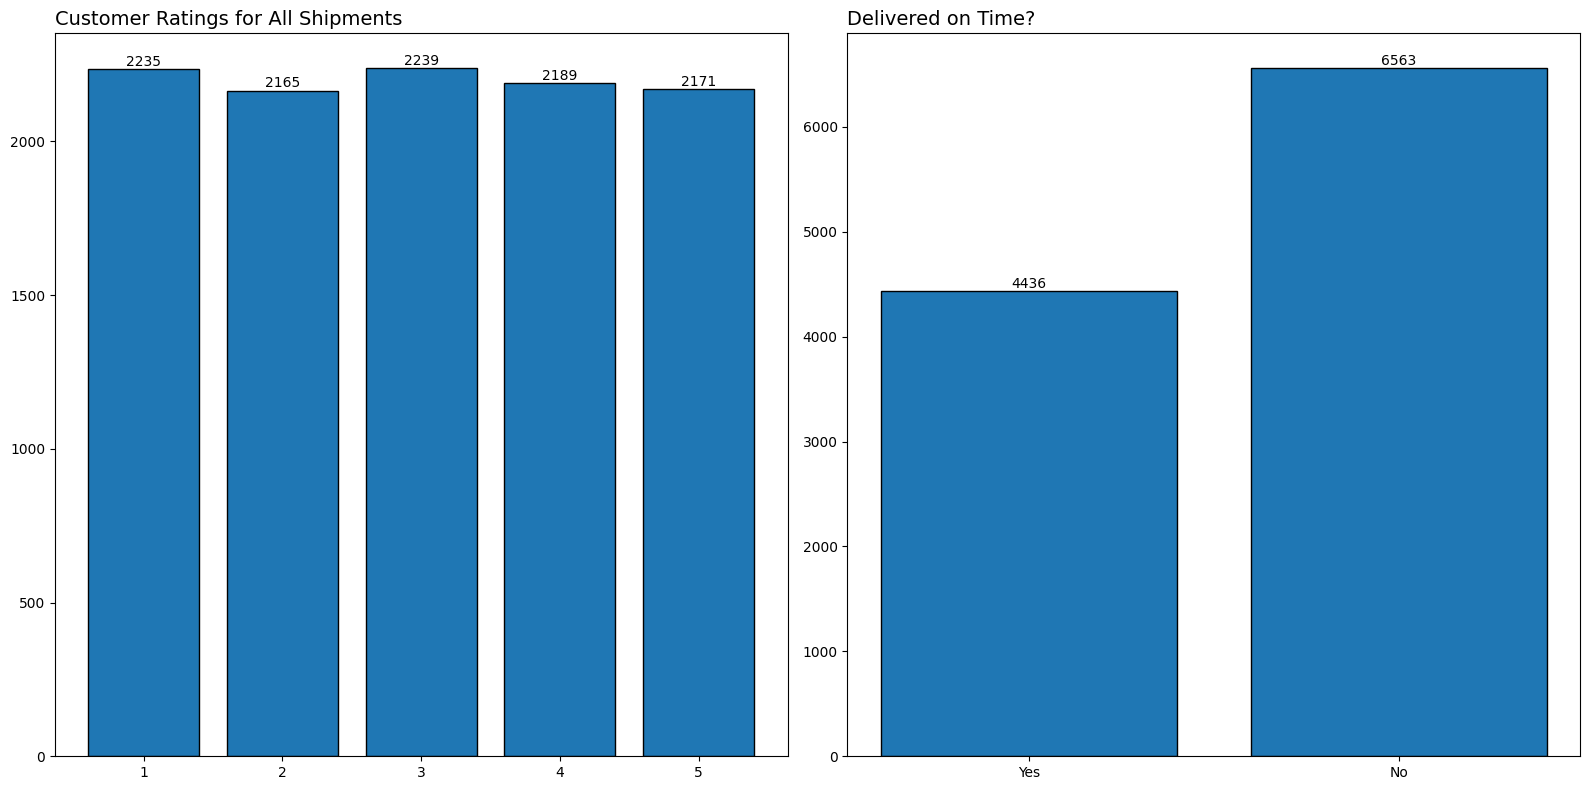

In [8]:
# Draft a summary report
overall_total = len(df)
overall_on_time = len(df[df['Reached.on.Time_Y.N'] == 0])
overall_late = len(df[df['Reached.on.Time_Y.N'] == 1])

# Rate
overall_rate = round(overall_on_time / overall_total * 100,2)


# Compute comparison sentence first
if overall_rate > overall_late:
    rate_text = (
        f"We can therefore confirm that most shipments were delivered on time."
    )
else:
    rate_text = (
        f"We can therefore confirm that most shipments were not delivered on time."
    )


report = f"""
The avearge customer service rating for the {len(df)} shipments in our dataset was {df['Customer_rating'].mean().round(2)}. Out of the {len(df)} shipments,
{len(df[df['Reached.on.Time_Y.N']==0])} were delivered on time and {len(df[df['Reached.on.Time_Y.N']==1])} were not delivered on time. This led to an 
on-time delivery rate of {overall_rate}%. {rate_text}
"""

display(Markdown(report))


# Create a side-by-side plot
customer_ratings_counts = df['Customer_rating'].value_counts()
on_time_counts = df['Reached.on.Time_Y.N'].value_counts().sort_index()  # ensures 0 then 1

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Left plot - Customer Ratings
ax[0].bar(customer_ratings_counts.index, customer_ratings_counts.values, edgecolor='black')
for bar in ax[0].patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax[0].text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)
ax[0].set_title('Customer Ratings for All Shipments', loc="left", fontsize=14)
ax[0].set_xlabel("")

# Right plot - On-Time Delivery
ax[1].bar(on_time_counts.index, on_time_counts.values, edgecolor='black')
for bar in ax[1].patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax[1].text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax[1].set_xticks([0, 1])                  # This line eliminates the warning
ax[1].set_xticklabels(['Yes', 'No'])

ax[1].set_title('Delivered on Time?', loc="left", fontsize=14)
ax[1].set_xlabel("")

plt.tight_layout()
plt.show()

### A Deeper Dive - Are there variables that correlate well to either to `Customer_care_calls` or `Customer_rating`?

C:\Users\derek\AppData\Local\Temp\ipykernel_14556\943670785.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


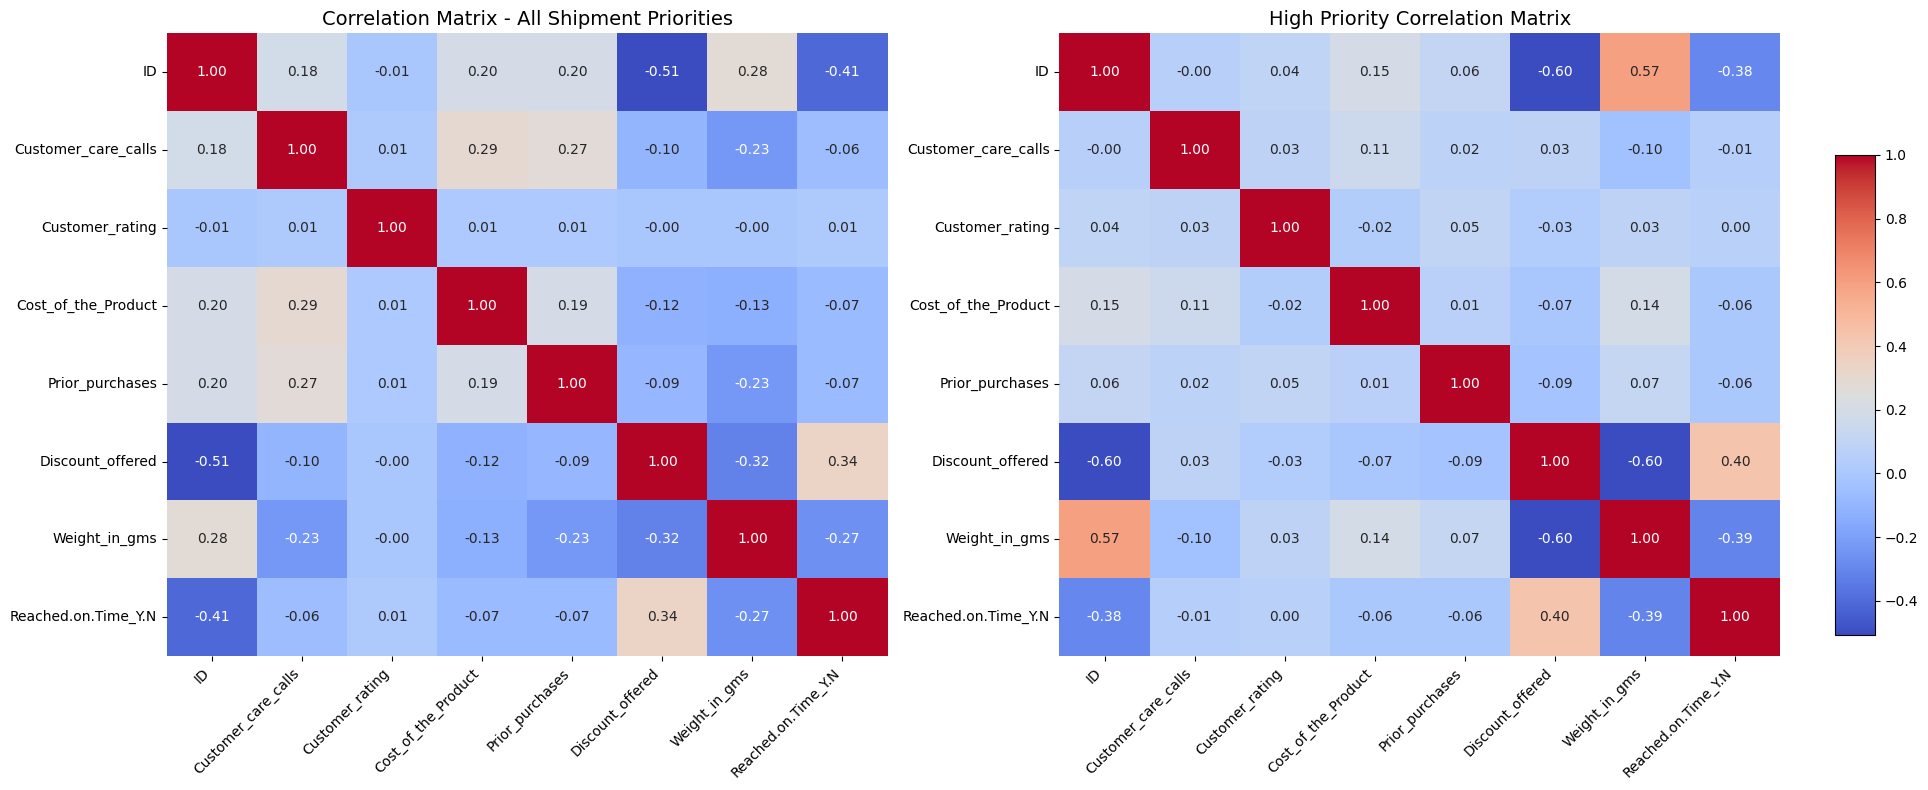

In [9]:
# --- 1. Prepare Data ---
q1_corr_matrix = df.corr(method = 'spearman',numeric_only=True)
important = df[df["Product_importance"] == "high"]
high_priority_corr_matrix = important.corr(numeric_only=True)

# --- 2. Setup the Figure and Axes ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 

# --- 3. Plot 1: All Shipments Correlation Matrix (Left) ---
heatmap1 = sns.heatmap(
    q1_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    ax=axes[0], 
    cbar=False
)
axes[0].set_title("Correlation Matrix - All Shipment Priorities", fontsize=14) 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].tick_params(axis='y', rotation=0)

# --- 4. Plot 2: High Priority Correlation Matrix (Right) ---
heatmap2 = sns.heatmap(
    high_priority_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    ax=axes[1], 
    cbar=False
)
axes[1].set_title("High Priority Correlation Matrix", fontsize=14) 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].tick_params(axis='y', rotation=0)

# --- 5. Add a Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) 

# Link the colorbar to the first heatmap
fig.colorbar(heatmap1.collections[0], cax=cbar_ax)

# --- 6. Final Adjustments ---
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Display the side-by-side plot
plt.show()

Before we move to the next question, let’s take a look at the correlation matrices for all shipments and the high priority shipments. We need to see if there are variables that correlate well with either the number of customer care calls or the customer rating. In the correlation matrices below, the full dataset shows that the cost of the product has a moderate positive correlation (0.29) with the number of customer care calls. Additionally, the number of customer care calls has a weak negative correlation (-0.28) with the weight of the product. Additionally, the weight of the product has a negative correlation with both the number of prior purchases (-0.23) and the discount offered (-0.32) Interestingly, the customer rating does not correlate well with any of the other variables, regardless of the shipment priority.

## Question 2: Do more customer care calls correlate with late deliveries or lower customer satisfaction?

<p>One of the most critical scores in a competitive industry like logistics is the customer satisfaction score. Customers have a wide range of carriers depending on what they are shipping and to where they're shipping the item(s). Carriers in the third-party logistics (3PL) segment such as UPS, DHL and FedEx understand this and know that late shipments lead to a quick decline in customer satisfaction. To check the performance of the shipments in this dataset, we segmented the following variables from the above correlation plots for easier analysis.</p>

- Customer_care_calls
- Reached.on.Time_Y.N
- Customer_rating

In [10]:
'''
The variables in question to check this correlation are :
Customer_care_calls
Reached.on.Time_Y.N
Customer_rating
'''

print(round(df[['Customer_care_calls', 'Reached.on.Time_Y.N', 'Customer_rating']].corr(method='spearman'),4))

                     Customer_care_calls  Reached.on.Time_Y.N  Customer_rating
Customer_care_calls               1.0000              -0.0643           0.0119
Reached.on.Time_Y.N              -0.0643               1.0000           0.0131
Customer_rating                   0.0119               0.0131           1.0000


<p>The strongest correlation in the above segmentation pertaining to Customer Care Calls is whether the item was delivered on time. However, the correlation is considered weak with a score of -0.0671. This means that as the number of calls increases, the likelihood of products not delivering on time increased slightly. The relationship is extremely weak and slightly negative, indicating that more customer care calls tend to occur when deliveries are not on time — but the effect is too small to be meaningful. After this analysis, we can conclude that the variables in this dataset do not contain empirically strong correlations to the number of Customer Care calls. Ergo, no, more calls to Customer Care do not correlate with late deliveries or customer satisfaction.</p>

## Question 3: For products with high importance, do they have the highest ratings or are they delivered on time?

<p>In the world of logistics, high priority means high stakes. In turn, high stakes create high rewards. One of the fastest ways for third party logistics (3PL) firms to create a competitive advantage is to deliver cargo ahead of schedule; especially in high priority situations. In our dataset's final question, we will examine if there is a difference in customer ratings or on-time delivery for high priority shipments. We will start this section by performing some analysis via scripting, then move on to data visualization and then conclude our findings. To make sure we are using only the high priority shipments, we will perform our analysis using the data frame titled `important` that we created earlier.</p>

In [11]:
mode_summary_high = (
    important.groupby('Mode_of_Shipment')
    .size()
    .reset_index(name='Shipment Mode Totals')
)

# Get a percentile representation across the whole dataset
total_high_priority = mode_summary_high['Shipment Mode Totals'].sum()

mode_summary_high['% of Total Shipments'] = (
    mode_summary_high['Shipment Mode Totals']/total_high_priority
)*100

# Round the result to two decimal places
mode_summary_high['% of Total Shipments'] = mode_summary_high['% of Total Shipments'].round(2)

# Test the new dataframe
mode_summary_high


,Mode_of_Shipment,Shipment Mode Totals,% of Total Shipments
0,Flight,163,17.19
1,Road,158,16.67
2,Ship,627,66.14


In [12]:
# Find the integer-location index (iloc index) of the maximum value
iloc_index_of_max = mode_summary_high['Shipment Mode Totals'].idxmax()
iloc_index_of_min = mode_summary_high['Shipment Mode Totals'].idxmin()

# Use .iloc to find the row with the highest shipments
row_with_highest_shipments = mode_summary_high.iloc[iloc_index_of_max]
row_with_lowest_shipments = mode_summary_high.iloc[iloc_index_of_min]

# Extract values
highest_mode = row_with_highest_shipments['Mode_of_Shipment']
highest_total = row_with_highest_shipments['Shipment Mode Totals']
highest_percent = row_with_highest_shipments['% of Total Shipments']

lowest_mode = row_with_lowest_shipments['Mode_of_Shipment']
lowest_total = row_with_lowest_shipments['Shipment Mode Totals']
lowest_percent = row_with_lowest_shipments['% of Total Shipments']


total_shipments = row_with_highest_shipments['Mode_of_Shipment']

high_priority_ss = f"""
**High Priority Shipment Summaries**

---


There are {sum(mode_summary_high['Shipment Mode Totals'])} shipments classified as high priority in our data. The mode with the most amount of shipments was {highest_mode}, with a total of {highest_total} ({highest_percent})% of all high priority shipments.
The mode with the least amount of shipments was {lowest_mode}, with a total of {lowest_total} ({lowest_percent})% of all high priority shipments.
"""
display(Markdown(high_priority_ss))


**High Priority Shipment Summaries**

---


There are 948 shipments classified as high priority in our data. The mode with the most amount of shipments was Ship, with a total of 627 (66.14)% of all high priority shipments.
The mode with the least amount of shipments was Road, with a total of 158 (16.67)% of all high priority shipments.


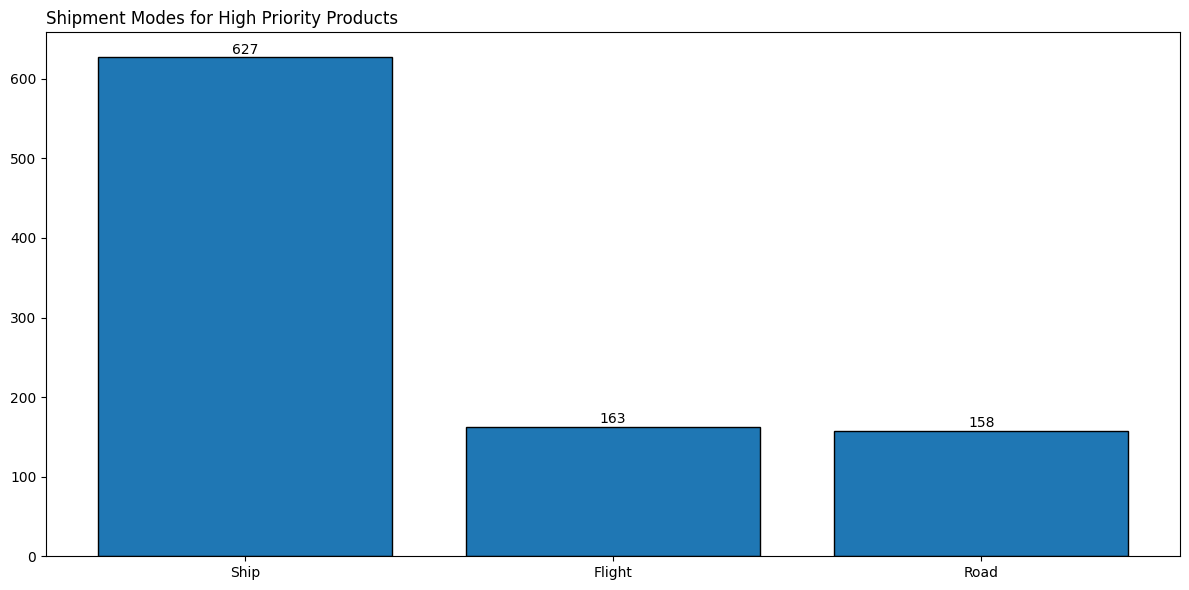

In [13]:
important_mode_counts = important['Mode_of_Shipment'].value_counts()
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(important_mode_counts.index, important_mode_counts.values, edgecolor = 'black')

for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() /2
    y = count
    ax.text(x, y + 0.5, str(count), ha = "center", va = "bottom", fontsize = 10)

plt.title("Shipment Modes for High Priority Products", loc="left")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Our initial analysis of the high priority shipments shows that roughly two-thirds of said shipments in our dataset were shipped via ship. While it may seem odd that most of the shipments were shipped via ship, it's worth noting that over 80% of the world's freight is shipped through this mode as the main means of transport. It is worth noting that ocean freight often uses ground transportation via rail or truck to get the cargo to and from the port of embarkation (POE) or port of debarkation (POD). However, this dataset measures the main mode of transportation, vice auxiliary modes for first or final mile logistics. With this understanding, the next step is to visualize our dataset and see if high priority shipments have the highest rating/are delivered on time.

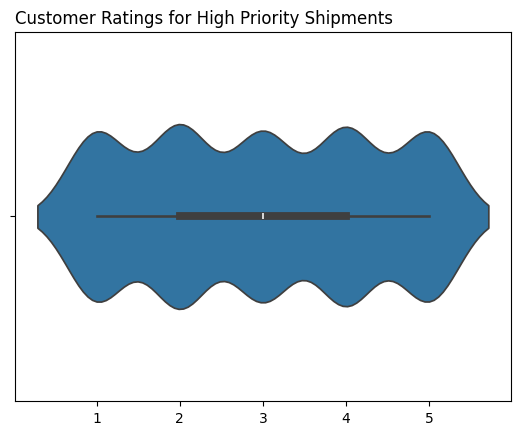


**Customer Service Metrics for High Priority Shipments**

The average customer service score for all shipments was **2.9905**, while high priority shipments averaged **2.9937**.
This means high priority shipments scored **0.0031** points higher on average.

---

**Shipment Delivery Metrics for High Priority Shipments**

Out of **948** high priority shipments, **332** were delivered on time and **616** were delivered late.  
This results in an on-time delivery rate of **35.02%** for high priority shipments.

Across the full dataset of **10999** shipments, **4436** were delivered on time and **6563** were delivered late, producing an overall on-time rate of **40.33%**.

**High priority shipments were delivered on time 5.31% less often than the overall average.**


In [14]:
# Create a side by side boxplot and bar chart of the high priority shipments
# Create a figure with 1 row and 2 columns


# --- Boxplot (axes[0]) ---
# Assign the plot to the first axes object using 'ax=axes[0]'

sns.violinplot(data = important, x = 'Customer_rating', width = 0.5)
plt.xlabel('')
plt.title('Customer Ratings for High Priority Shipments', loc = "left")
plt.show()


# Overall metrics for the below report
overall_cs = df['Customer_rating'].mean()
important_cs = important['Customer_rating'].mean()
cs_diff = important_cs - overall_cs


# Counts for the below report
hp_total = len(important)
hp_on_time = len(important[important['Reached.on.Time_Y.N'] == 0])
hp_late = len(important[important['Reached.on.Time_Y.N'] == 1])

overall_total = len(df)
overall_on_time = len(df[df['Reached.on.Time_Y.N'] == 0])
overall_late = len(df[df['Reached.on.Time_Y.N'] == 1])

# Rates
hp_rate = hp_on_time / hp_total * 100
overall_rate = overall_on_time / overall_total * 100
rate_diff = hp_rate - overall_rate

# Compute comparison sentence first
if rate_diff > 0:
    comparison_text = (
        f"High priority shipments were delivered on time {rate_diff:.2f}% more often than the overall average."
    )
else:
    comparison_text = (
        f"High priority shipments were delivered on time {-rate_diff:.2f}% less often than the overall average."
    )

cs_high_priority = f"""
**Customer Service Metrics for High Priority Shipments**

The average customer service score for all shipments was **{overall_cs:.4f}**, while high priority shipments averaged **{important_cs:.4f}**.
This means high priority shipments scored **{cs_diff:.4f}** points higher on average.

---

**Shipment Delivery Metrics for High Priority Shipments**

Out of **{hp_total}** high priority shipments, **{hp_on_time}** were delivered on time and **{hp_late}** were delivered late.  
This results in an on-time delivery rate of **{hp_rate:.2f}%** for high priority shipments.

Across the full dataset of **{overall_total}** shipments, **{overall_on_time}** were delivered on time and **{overall_late}** were delivered late, producing an overall on-time rate of **{overall_rate:.2f}%**.

**{comparison_text}**
"""

display(Markdown(cs_high_priority))


In answering the third question for the dataset, the answer is no. Yes, the high priority shipments scored wass 0.0031 better (on a scale of 0 to 5), which is low enough to be considered noise. Interestingly, the high priority shipments scored measurably lower in terms of on-time delivery when compared to all shipments. While speculative, there could be numerous reasons for this such as:
- Delays in customs clearance at the ports
- Difficulty in finding drivers to deliver the load
- Heavy seasonal volume at points along the chain

# Conclusion

In [15]:
display(Markdown('''**High Priority Shipments vs. All Shipments - Descriptive Statistics**'''))
display(Markdown('''***High Priority Shipments***'''))
important[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
           'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']].describe().round(2)

**High Priority Shipments vs. All Shipments - Descriptive Statistics**

***High Priority Shipments***

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,948.00,948.00,948.00,948.00,948.00,948.00,948.00
mean,3.87,2.99,203.87,3.66,14.67,4005.55,0.65
std,1.05,1.41,46.70,1.97,17.34,1478.10,0.48
min,2.00,1.00,96.00,2.00,1.00,1007.00,0.00
25%,3.00,2.00,165.00,2.00,4.00,2848.75,0.00
50%,4.00,3.00,205.50,3.00,7.00,4408.00,1.00
75%,5.00,4.00,243.00,4.00,18.00,5204.00,1.00
max,7.00,5.00,307.00,10.00,65.00,6000.00,1.00


In [16]:
display(Markdown('''***All Shipments***'''))
df[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 
    'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']].describe().round(2)

***All Shipments***

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


<p>This analysis reveals several important insights about e-commerce shipping performance:</p>

**Key Findings**<br>
 - Shipping distance and total transit time are the strongest operational drivers of late delivery.<br>
 - Certain warehouses contribute disproportionately to late shipments, indicating uneven internal process performance.<br>
 - High-value and high-importance products show higher delay rates, potentially due to additional handling requirements.<br>
 - Customer ratings correlate weakly with delivery timeliness, suggesting that perceptions of service quality depend on more than punctuality.<br>

 **Recommendations**<br>
 - Implement distance-based SLA tiers, especially for long-haul shipments.<br>
 - Audit operational workflows for underperforming warehouses.<br>
 - Introduce priority-handling optimization for high-importance products.<br>
 - Use predictive modeling (e.g., logistic regression or gradient boosting) to proactively flag high-risk shipments before dispatch.<br>

Future work can expand on this foundation by incorporating ML-based classification, SHAP value interpretation, and real-time logistics forecasting.